# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#Building Query URL
query_url = f"{base_url}appid={'72c5ebacab761dbce48b5ada744b9063'}&q="


In [7]:
# Creating Empty Lists
city_wx = []
lat = []
lon = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

# Using a For Loop to Make Successive API Calls
record_count = 1
set_count = 1

print('Beginning Data Retrieval')
print('------------------------')

# Loop Through Each City
# OpenWeather API will Allow 60 Calls/Min
# The Counter and .sleep Method will Us to Freely Call Data
for city in cities:
    if record_count >= 50:
        time.sleep(60)
        record_count = 0
        set_count += 1

    # Making Requests        
    response = requests.get(query_url + city + '&units=imperial').json()
    record_count += 1
   
    # Using Try/Except to Grab Variables if Available
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_wx.append(city)
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
    except KeyError:
        print('City not found. Skipping...')
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 2 of Set 1 | chokurdakh
City not found. Skipping...
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | omboue
Processing Record 6 of Set 1 | iberia
Processing Record 7 of Set 1 | capreol
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | rocha
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | lovozero
City not found. Skipping...
Processing Record 14 of Set 1 | belaya gora
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | nikolskoye
City not found. Skipping...
Processing Record 18 of Set 1 | kayes
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | opuwo
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | damietta
Processing Record 23 of Set 1 | half moon bay
Processing Record 24 of Set 1 | hermanus
Processing Record 25 of Set 1 | hervey bay
Processing Recor

Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 5 | lithakia
Processing Record 11 of Set 5 | haines junction
Processing Record 12 of Set 5 | mersing
Processing Record 13 of Set 5 | muravlenko
Processing Record 14 of Set 5 | thompson
Processing Record 15 of Set 5 | pierre
Processing Record 16 of Set 5 | dingle
Processing Record 17 of Set 5 | butaritari
Processing Record 18 of Set 5 | maungaturoto
Processing Record 19 of Set 5 | ilebo
Processing Record 20 of Set 5 | korla
Processing Record 21 of Set 5 | chuy
Processing Record 22 of Set 5 | dothan
Processing Record 23 of Set 5 | codrington
City not found. Skipping...
Processing Record 25 of Set 5 | yulara
City not found. Skipping...
Processing Record 27 of Set 5 | safaga
Processing Record 28 of Set 5 | ilulissat
Processing Record 29 of Set 5 | kenora
Processing Record 30 of Set 5 | rawson
Processing Record 31 of Set 5 | roura
Processing Record 32 of Set 5 | leh
Processing Record 33 of Set 5 | jumla
Processing Record 34 of

Processing Record 15 of Set 9 | beloha
Processing Record 16 of Set 9 | kulhudhuffushi
Processing Record 17 of Set 9 | andenes
City not found. Skipping...
Processing Record 19 of Set 9 | bengkulu
Processing Record 20 of Set 9 | moose factory
Processing Record 21 of Set 9 | ust-ishim
Processing Record 22 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 9 | erzin
Processing Record 24 of Set 9 | vila
Processing Record 25 of Set 9 | kindu
Processing Record 26 of Set 9 | bilma
Processing Record 27 of Set 9 | arkhangelsk
Processing Record 28 of Set 9 | kashi
Processing Record 29 of Set 9 | sakakah
Processing Record 30 of Set 9 | grindavik
Processing Record 31 of Set 9 | catuday
Processing Record 32 of Set 9 | geraldton
Processing Record 33 of Set 9 | torbay
Processing Record 34 of Set 9 | pirapozinho
Processing Record 35 of Set 9 | sibenik
Processing Record 36 of Set 9 | san quintin
Processing Record 37 of Set 9 | carutapera
Processing Record 38 of Set 9 | nyagan
Processing Re

In [8]:
data_df= pd.DataFrame({'City':city_wx, 'Lat':lat, 'Lng':lon, 'Max Temp':maxTemp, 
                         'Humidity': humidity, 'Cloudiness': cloudiness,'Wind Speed':windSpeed, 
                         'Country':country, 'Date':date })
data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,67.84,43,100,12.50,RU,1624101407
1,qaanaaq,77.4840,-69.3632,36.14,57,71,5.06,GL,1624101408
2,omboue,-1.5746,9.2618,82.29,67,44,12.37,GA,1624101408
3,iberia,29.9502,-91.7507,73.96,94,90,11.50,US,1624101408
4,capreol,46.7060,-80.9225,58.55,79,20,1.01,CA,1624101408


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
data_df= pd.read_csv('Resources/cities.csv')
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [67]:
cities_df.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
# Inspecting Data for Humidity Greater than 100%
humidity_df = data_df['Humidity'].max()

# If Humidity Greater than 100%, Create DataFrame with Humidity <=100%
if humidity_df > 100:
    data_df = data_df.loc[data_df['Humidity']<=100]
    data_df = pd.DataFrame(data_df)
    print(data_df)
else:
    print('No Humidity Over 100%')

No Humidity Over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

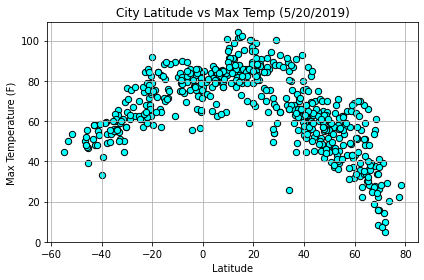

In [77]:
# Creating DateStamp that will Update with Each Call
datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Temperature vs Latitude
data_df.plot.scatter('Lat', 'Max Temp', grid=True, color='cyan', edgecolor='k', s=40)

# Labelling the Plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temp ({title_date})')
plt.tight_layout()

# Saving Figure as PNG
plt.savefig('../output_data/Fig1.png')

This plot is analyzing the relationship of surface temperatures across different latitudes.

## Latitude vs. Humidity Plot

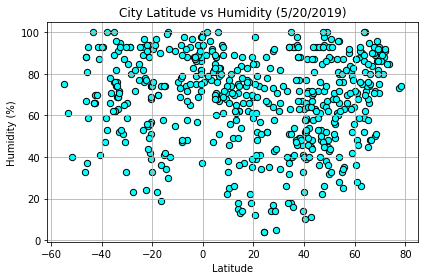

In [79]:
# # Creating DateStamp that will Update with Each Call
datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Humidity vs Latitude
data_df.plot.scatter('Lat', 'Humidity', grid=True, color='cyan', edgecolor='k', s=40)

# Labelling the Plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({title_date})')
plt.tight_layout()

# Saving Figure as PNG
plt.savefig('../output_data/Fig2.png')

 This plot is analyzing the relationship of surface humidity across different latitudes.

# Latitude vs. Cloudiness Plot

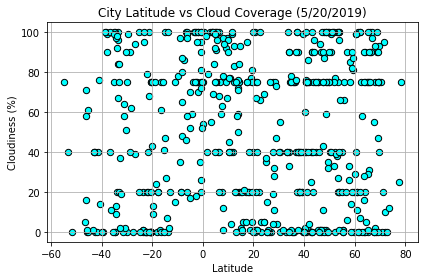

In [80]:

# Plotting Cloudiness vs Latitude
data_df.plot.scatter('Lat', 'Cloudiness', grid=True, color='cyan', edgecolor='k', s=40)

# Labelling the Plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloud Coverage ({title_date})')
plt.tight_layout()

# Saving Figure as PNG
plt.savefig('../output_data/Fig3.png')

This plot is analyzing the relationship of cloud coverage across different latitudes. 

## Latitude vs. Wind Speed Plot

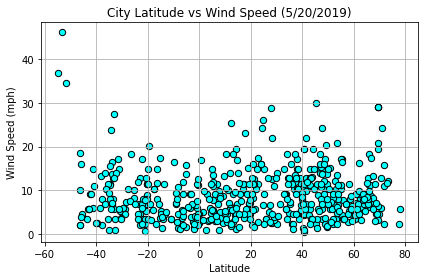

In [53]:

# Plotting Wind Speed vs Latitude
data_df.plot.scatter('Lat', 'Wind Speed', grid=True, color='cyan', edgecolor='k', s=40)

# Labelling the Plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({title_date})')
plt.tight_layout()

# Saving Figure as PNG
plt.savefig('../output_data/Fig4.png')

 This plot is analyzing the relationship between surface wind speeds across different latitudes. 

## Linear Regression

The Correlation Value is: -0.82.


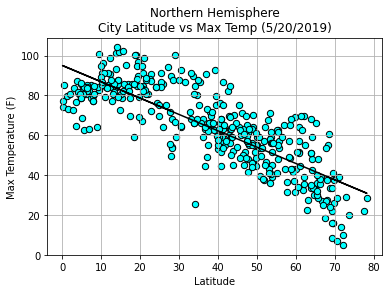

In [81]:
# Grabbing Data with a Latitude Greater than or Equal to 0 Degrees
northHem_df = data_df.loc[data_df['Lat']>=0,:]

# Setting Latitude as x_value
x_value = northHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Max Temp'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Temp vs Latitude
northHem_df.plot.scatter('Lat', 'Max Temp', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Max Temp ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(0,-20), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

In the Northern Hemisphere, there will always be a negative linear relationship between surface temperature and latitude

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation Value is: 0.77.


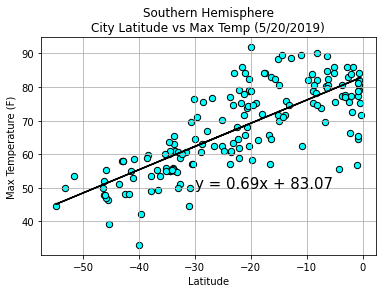

In [82]:
# Grabbing Data with a Latitude Less than or Equal to 0 Degrees
southHem_df = data_df.loc[data_df['Lat']<=0,:]

# Setting Latitude as x_value
x_value = southHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Max Temp'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Temp vs Latitude
southHem_df.plot.scatter('Lat', 'Max Temp', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Max Temp ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-30,50), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

 In the Southern Hemisphere, there will always be a positive linear relationship between surface temperature and latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation Value is: 0.1.


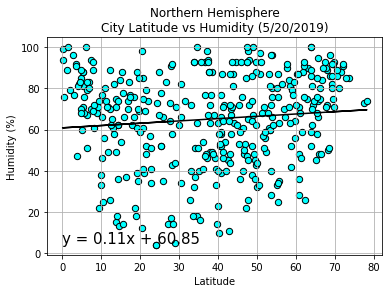

In [83]:
# Grabbing Data with a Latitude Greater than or Equal to 0 Degrees
northHem_df = data_df.loc[data_df['Lat']>=0,:]

# Setting Latitude as x_value
x_value = northHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Humidity'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Humidity vs Latitude
northHem_df.plot.scatter('Lat', 'Humidity', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Humidity ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(0,5), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

The linear regression model and rvalue would suggest a weak, positive relationship between humidity and latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation Value is: 0.11.


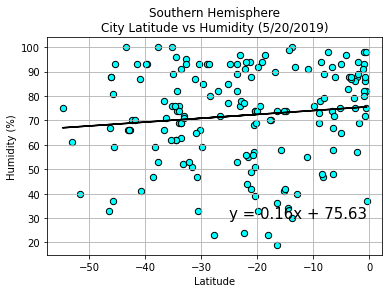

In [84]:
# Grabbing Data with a Latitude Less than or Equal to 0 Degrees
southHem_df = data_df.loc[data_df['Lat']<=0,:]

# Setting Latitude as x_value
x_value = southHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Humidity'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Humidity vs Latitude
southHem_df.plot.scatter('Lat', 'Humidity', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Humidity ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-25,30), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation Value is: -0.09.


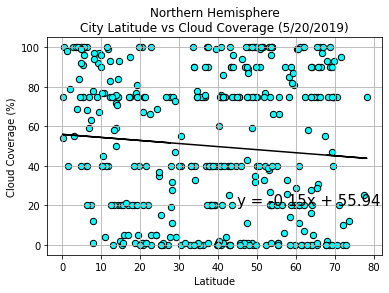

In [85]:
#  Grabbing Data with a Latitude Greater than or Equal to 0 Degrees
northHem_df = data_df.loc[data_df['Lat']>=0,:]

# Setting Latitude as x_value
x_value = northHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Cloudiness'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Cloudiness vs Latitude
northHem_df.plot.scatter('Lat', 'Cloudiness', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Cloud Coverage ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(45,20), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

 The data would suggest a very weak, negative relationship amoung cloud coverage and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation Value is: 0.23.


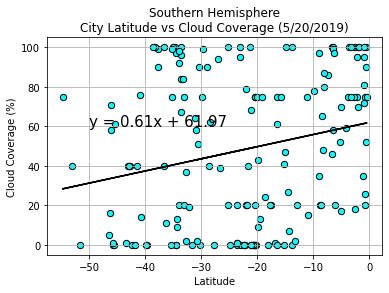

In [86]:
# Grabbing Data with a Latitude Less than or Equal to 0 Degrees
southHem_df = data_df.loc[data_df['Lat']<=0,:]

# Setting Latitude as x_value
x_value = southHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Cloudiness'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Cloudiness vs Latitude
southHem_df.plot.scatter('Lat', 'Cloudiness', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Cloud Coverage ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-50,60), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

The data would suggest a very weak, positive relationship amoung cloud coverage and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation Value is: 0.11.


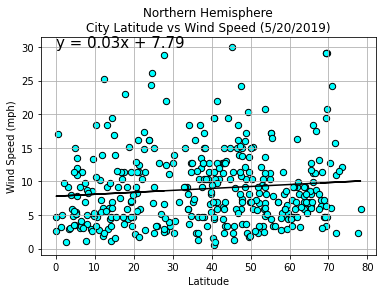

In [88]:
# Grabbing Data with a Latitude Greater than or Equal to 0 Degrees
northHem_df = data_df.loc[data_df['Lat']>=0,:]

# Setting Latitude as x_value
x_value = northHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Wind Speed'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Wind vs Latitude
northHem_df.plot.scatter('Lat', 'Wind Speed', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Wind Speed ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(0,30), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

 There is no linear relationship amoung wind speed and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation Value is: -0.34.


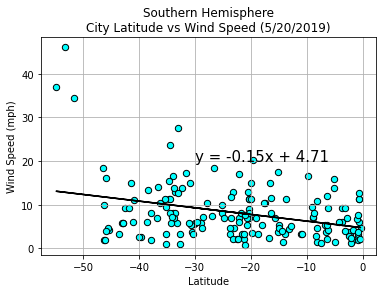

In [89]:
# Grabbing Data with a Latitude Less than or Equal to 0 Degrees
southHem_df = data_df.loc[data_df['Lat']<=0,:]

# Setting Latitude as x_value
x_value = southHem_df['Lat']

# Solving for Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Wind Speed'])

# Creating Line Equation
regress_value = x_value*slope + intercept

# Creating DateStamp that will Update with Each Call
datestamp = datestamp = time.gmtime(data_df['Date'][0])
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

# Plotting Wind vs Latitude
southHem_df.plot.scatter('Lat', 'Wind Speed', grid=True, color='cyan', edgecolor='k', s=40)

# Plotting Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Wind Speed ({title_date})')

# Creating String of Line Equation to Overlay on Plot
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting Linear Regression and Equation
plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-30,20), fontsize=15)

# Print rvalue
print(f'The Correlation Value is: {round(rvalue,2)}.')

 There is no linear relationship amoung wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =-0.15x + 4.71.
The r-squared is: -0.33605638539234134
The regression displays a negative correlation.


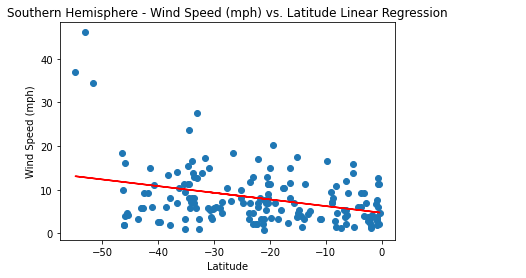

In [93]:

x_values = pd.to_numeric(southHem_df['Lat']).astype(float)
y_values = pd.to_numeric(southHem_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")

      
plt.show()

 In the Southern Hemisphere, this plot shows that the wind speed slightly decreases while moving closer to the equator.